(100, 176, 3)
plt.imshow(img)


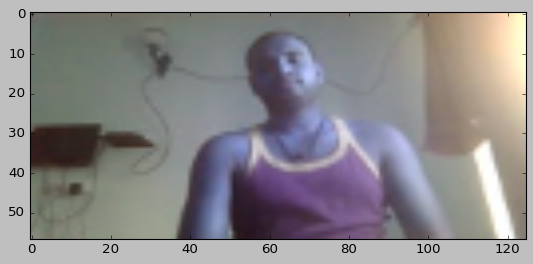

  2%|▏         | 10/500 [00:00<00:05, 92.87it/s]

(3, 125, 57, 16)
500
import Doing other things finish!!


  2%|▏         | 9/500 [00:00<00:05, 87.02it/s]

(3, 125, 57, 16)
1000
import No Gesture finish!!


  2%|▏         | 10/500 [00:00<00:05, 94.52it/s]

(3, 125, 57, 16)
1500
import Stop Sign finish!!


  2%|▏         | 10/500 [00:00<00:04, 99.99it/s]

(3, 125, 57, 16)
2000
import swipe down finish!!


  2%|▏         | 9/500 [00:00<00:05, 86.19it/s]

(3, 125, 57, 16)
2500
import swipe left finish!!


  2%|▏         | 10/500 [00:00<00:05, 93.65it/s]

(3, 125, 57, 16)
3000
import swiping right finish!!


  2%|▏         | 10/500 [00:00<00:05, 90.91it/s]

(3, 125, 57, 16)
3500
import swiping up finish!!


  2%|▏         | 10/500 [00:00<00:04, 99.06it/s]

(3, 125, 57, 16)
4000
import thumb up finish!!


100%|██████████| 500/500 [00:05<00:00, 96.78it/s]


(3, 125, 57, 16)
4500
import Thumb Down finish!!
4500
[0 0 0 ... 8 8 8]
X_Train shape: (4500, 3, 125, 57, 16)
(4500, 3, 125, 57, 16) train samples


In [37]:
%run load_data_jester500.ipynb

# Define Model

In [38]:
from keras.optimizers import Adam, rmsprop
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D, ZeroPadding3D
from keras.optimizers import SGD
from keras.layers import Dense,Dropout,Conv3D,Input,MaxPool3D,Flatten,Activation,ZeroPadding3D,BatchNormalization
from keras.regularizers import l2
from keras.models import Model
import keras

input_shape = (3,img_rows,img_cols,img_depth) ##channel first ##channel,spatial_dim1, spatial_dim2, spatial_dim3,
weight_decay = 0.005
nb_classes = 9

## CNN Training parameters

In [39]:
nb_classes = 9
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
print(Y_train)
input_shape = (3, img_rows, img_cols, img_depth)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [40]:
model = Sequential()

model.add(Conv3D(64,(3,3,3),strides=(1,1,1), input_shape= input_shape, name='conv1', padding='same',data_format="channels_first", activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2), name='pool1',padding='same',data_format="channels_first"))

model.add(Conv3D(64,(3,3,3),strides=(1,1,1), input_shape= input_shape, name='conv2', padding='same',data_format="channels_first", activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2), name='pool2',padding='same',data_format="channels_first"))

#fully connected layer
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_regularizer=l2(weight_decay)))
model.add(Dropout(0.5))
model.add(Dense(nb_classes,activation='softmax',kernel_regularizer=l2(weight_decay)))

print(model.summary())
#opt = keras.optimizers.Adam(lr=0.001)
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt ,metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv3D)               (None, 64, 125, 57, 16)   5248      
_________________________________________________________________
pool1 (MaxPooling3D)         (None, 64, 63, 29, 8)     0         
_________________________________________________________________
conv2 (Conv3D)               (None, 64, 63, 29, 8)     110656    
_________________________________________________________________
pool2 (MaxPooling3D)         (None, 64, 32, 15, 4)     0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 122880)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               15728768  
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
__________

## split data

In [41]:
X_train_new, X_val_new, y_train_new,y_val_new =  train_test_split(train_set, Y_train, test_size=0.2, random_state=4)
X_train_new = X_train_new.astype('float32')
X_val_new = X_val_new.astype('float32')
X_train_new /= 255.
X_val_new /= 255.

In [42]:
batch_size = 30
nb_epoch = 500

# Use ModelCheckpoint to save model and weights
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'C3D_model_jester_RGB.h5'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)

# earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=50, verbose=1)


hist = model.fit(X_train_new, y_train_new, 
                 validation_data=(X_val_new,y_val_new),
                 batch_size=batch_size,
                 epochs = nb_epoch, 
                 shuffle=True, 
                 callbacks=[checkpoint, earlystop])

Train on 3600 samples, validate on 900 samples
Epoch 1/500
3600/3600 [==============================] - 27s 8ms/step - loss: 3.0349 - acc: 0.1183 - val_loss: 2.5466 - val_acc: 0.1378

Epoch 00001: val_loss improved from inf to 2.54664, saving model to /home/jovyan/project/saved_models/C3D_model_jester_RGB.h5
Epoch 2/500
3600/3600 [==============================] - 26s 7ms/step - loss: 2.4113 - acc: 0.2356 - val_loss: 2.2703 - val_acc: 0.2689

Epoch 00002: val_loss improved from 2.54664 to 2.27034, saving model to /home/jovyan/project/saved_models/C3D_model_jester_RGB.h5
Epoch 3/500
3600/3600 [==============================] - 26s 7ms/step - loss: 2.1903 - acc: 0.3547 - val_loss: 2.1452 - val_acc: 0.3756

Epoch 00003: val_loss improved from 2.27034 to 2.14519, saving model to /home/jovyan/project/saved_models/C3D_model_jester_RGB.h5
Epoch 4/500
3600/3600 [==============================] - 26s 7ms/step - loss: 2.0529 - acc: 0.4292 - val_loss: 2.0658 - val_acc: 0.4289

Epoch 00004: val_lo

In [43]:
# loading our save model
print("Loading trained model")
model = load_model(model_path)

Loading trained model


In [44]:
score = model.evaluate(X_val_new, y_val_new, batch_size=batch_size)
print('Test score:', score[0])
print('Test accuracy:', score[1]) 

900/900 [==============================] - 3s 4ms/step
Test score: 1.9942599773406982
Test accuracy: 0.47555556197961174


['seaborn-notebook', 'classic', 'seaborn-pastel', 'seaborn-white', 'seaborn-talk', 'bmh', 'seaborn', 'Solarize_Light2', 'seaborn-bright', 'seaborn-ticks', 'seaborn-paper', 'seaborn-muted', 'seaborn-darkgrid', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn-dark', 'grayscale', 'dark_background', 'seaborn-colorblind', 'seaborn-deep', '_classic_test', 'tableau-colorblind10', 'ggplot', 'seaborn-whitegrid', 'seaborn-poster', 'fast']
['seaborn-notebook', 'classic', 'seaborn-pastel', 'seaborn-white', 'seaborn-talk', 'bmh', 'seaborn', 'Solarize_Light2', 'seaborn-bright', 'seaborn-ticks', 'seaborn-paper', 'seaborn-muted', 'seaborn-darkgrid', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn-dark', 'grayscale', 'dark_background', 'seaborn-colorblind', 'seaborn-deep', '_classic_test', 'tableau-colorblind10', 'ggplot', 'seaborn-whitegrid', 'seaborn-poster', 'fast']


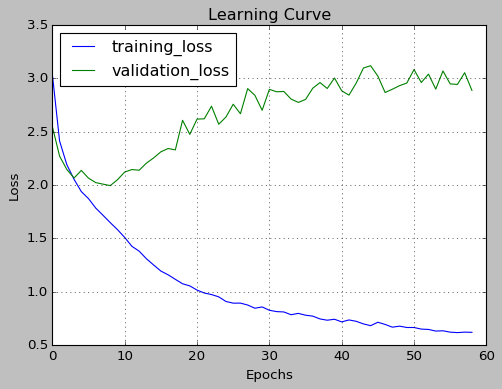

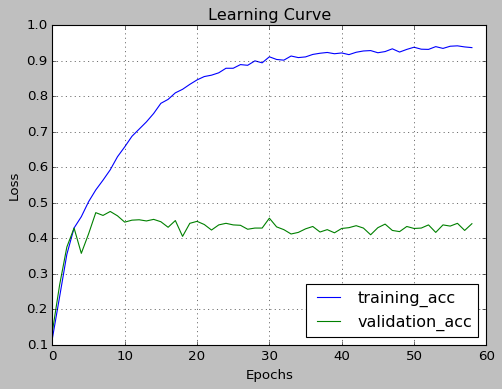

In [45]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

plt.figure(1,figsize=(7,5))
plt.plot(train_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.title("Learning Curve")
plt.legend(loc='best')
print (plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(train_acc, label="training_acc")
plt.plot(val_acc, label="validation_acc")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.title("Learning Curve")
plt.legend(loc='best')
print (plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


In [46]:
import itertools
def confusion_matrix_plot(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [47]:
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

In [48]:
#model.fit(X_train_new, y_train_new)
#y_pred = model.predict(X_val_new)
y_pred = model.predict(train_set)

#a = np.argmax(y_val_new, axis=1)
a = np.argmax(Y_train, axis=1)
b = np.argmax(y_pred, axis=1)
#print("benchmark : ",a)
#print("predict : ",b)

In [49]:
met = confusion_matrix(a, b)
np.set_printoptions(precision=2)
print(met)

[[285  35  44  20  16  24  21  27  27]
 [ 10 483   6   3   0   3   2   0   0]
 [ 25  27 327  39   7   8  35  21  10]
 [ 16   7  54 318  14  13  22  21  34]
 [ 16  22  11  14 377  17  16  11  15]
 [ 23  19   4   4  16 404  16  12   1]
 [ 19  25  36  38  10  11 320  23  17]
 [ 16  17  60  45  18  19  49 266   9]
 [ 26  15  19  31  19   3  11   7 369]]


Normalized confusion matrix
[[0.57 0.07 0.09 0.04 0.03 0.05 0.04 0.05 0.05]
 [0.02 0.95 0.01 0.01 0.   0.01 0.   0.   0.  ]
 [0.05 0.05 0.66 0.08 0.01 0.02 0.07 0.04 0.02]
 [0.03 0.01 0.11 0.64 0.03 0.03 0.04 0.04 0.07]
 [0.03 0.04 0.02 0.03 0.76 0.03 0.03 0.02 0.03]
 [0.05 0.04 0.01 0.01 0.03 0.81 0.03 0.02 0.  ]
 [0.04 0.05 0.07 0.08 0.02 0.02 0.64 0.05 0.03]
 [0.03 0.03 0.12 0.09 0.04 0.04 0.1  0.53 0.02]
 [0.05 0.03 0.04 0.06 0.04 0.01 0.02 0.01 0.74]]


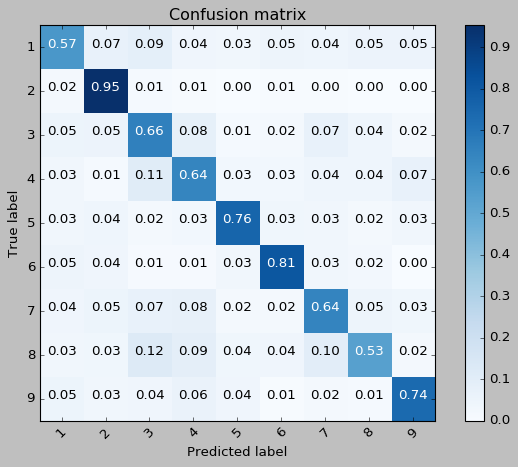

In [50]:
confusion_matrix_plot(met, normalize=True, classes=['1', '2', '3', '4', '5', '6', '7', '8', '9'])